In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm

import ast

import matplotlib.pyplot as plt


In [2]:
folder = '/dlabdata1/lugeon/'
name = 'websites_alexa_10000_5cat_emb_bert'
ext = '.gz'
data = pd.read_csv(folder + name + ext, names = ['last_id', 'uid', 'emb', 'cat0'], header=0)

In [3]:
data = data[data.emb.notnull()]

In [4]:
data['emb'] = data.apply(lambda row: np.array(ast.literal_eval(row.emb)), axis=1)

In [5]:
data.head()

,last_id,uid,emb,cat0
0,0,36126,"[-0.5465862154960632, -0.4531528055667877, 0.5...",Arts
1,1,25238,"[-0.5333141684532166, -0.25329938530921936, 0....",Arts
2,2,20371,"[-0.5620501637458801, -0.5124451518058777, 0.8...",Arts
3,3,11312,"[-0.6283508539199829, -0.11153016984462738, 0....",Arts
4,4,16434,"[-0.062120892107486725, -0.3814326822757721, 0...",Arts


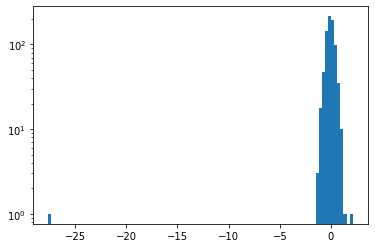

In [6]:
plt.hist(data.emb[0], bins=100)
plt.yscale('log')
plt.show()

In [7]:
np.argmin(data.emb[0])

227

In [8]:
data['emb_red'] = data.emb.apply(lambda x: np.delete(x, 227))

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

In [9]:
x = np.concatenate(data.emb_red.to_numpy()).ravel()

In [10]:
x = x.reshape(-1, 767)
x.shape

(38533, 767)

In [60]:
x_2 = pca.fit_transform(x)

In [61]:
x_2

array([[ 0.85895749,  0.14646902],
       [-0.61199011,  0.12416572],
       [-1.35809235, -0.46548418],
       ...,
       [-0.17315321, -1.84199642],
       [ 5.50560061, -0.44409836],
       [-1.88068303,  0.04085936]])

In [62]:
def categorize(s):
    if s == 'Health':
        return 0
    if s == 'Science':
        return 1
    if s == 'Arts':
        return 2
    if s == 'Computers':
        return 3
    if s == 'Sports':
        return 4

In [11]:
i_sports = data[data.cat0 == 'Sports'].index
i_arts = data[data.cat0 == 'Arts'].index
i_health = data[data.cat0 == 'Health'].index
i_science = data[data.cat0 == 'Science'].index
i_computers = data[data.cat0 == 'Computers'].index

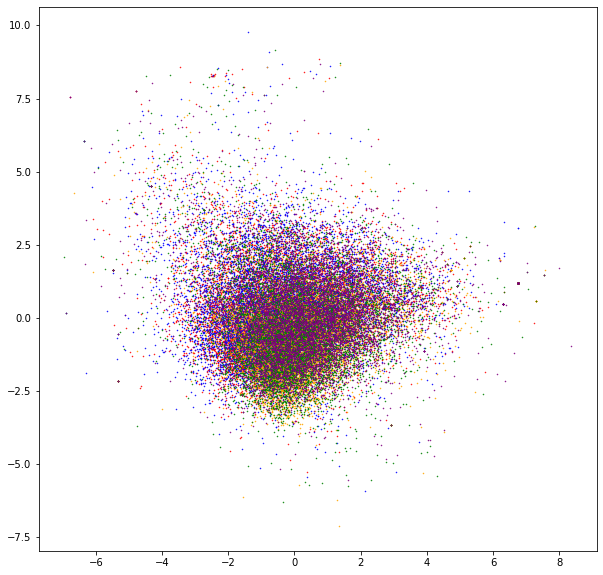

In [80]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(10,10))

marker_size=1

plt.scatter(x_2[i_sports][:,0], x_2[i_sports][:,1], color='red', marker='.', s=marker_size, alpha=1)
plt.scatter(x_2[i_arts][:,0], x_2[i_arts][:,1], color='blue', marker='.', s=marker_size, alpha=1)
plt.scatter(x_2[i_health][:,0], x_2[i_health][:,1], color='orange', marker='.', s=marker_size, alpha=1)
plt.scatter(x_2[i_science][:,0], x_2[i_science][:,1], color='green', marker='.', s=marker_size, alpha=1)
plt.scatter(x_2[i_computers][:,0], x_2[i_computers][:,1], color='purple', marker='.', s=marker_size, alpha=1)

plt.show()

In [12]:
from sklearn.manifold import TSNE

In [13]:
x_tsne = TSNE(n_components=2).fit_transform(x)

In [16]:
categories = data.cat0.unique()

#colormap = plt.get_cmap('tab20')


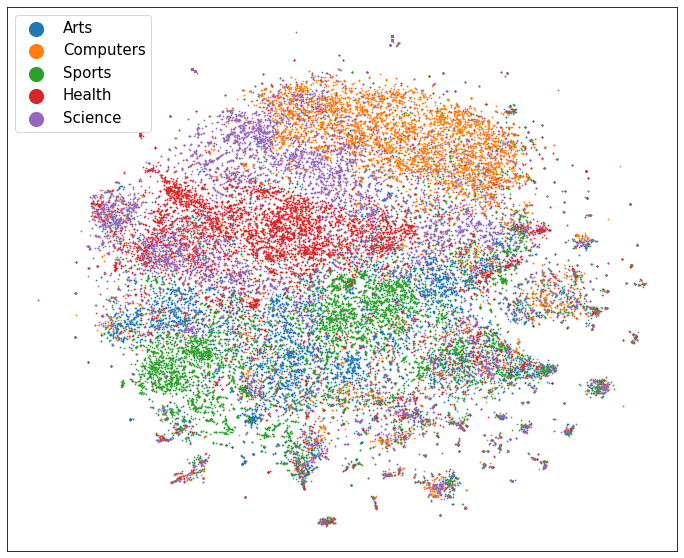

In [37]:
opacity = 1
marker_size = 2
marker = '.'

plt.figure(figsize=(12,10))

n = 0

for cat in categories:
    ix = data[data.cat0 == cat].index
    x_val = x_tsne[ix][:,0]
    y_val = x_tsne[ix][:,1]
    plt.scatter(x_val, y_val, marker=marker, s=marker_size, alpha=opacity, label=cat)
    
    n += 1
    
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

    
#plt.title('t-SNE decomposition of websites among 17 categories')
plt.legend(markerscale=20, fontsize=15)
plt.plot();

In [ ]:
z